In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

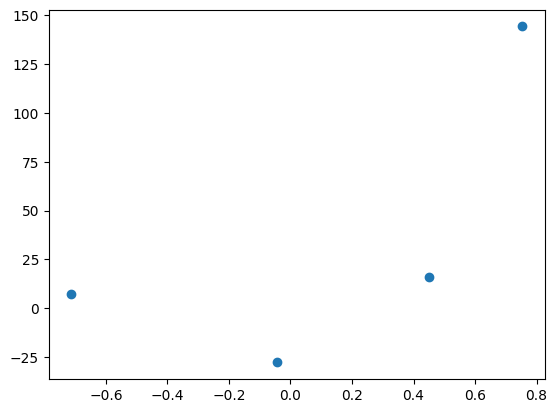

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [4]:
# lets apply OLS
from sklearn.linear_model import LinearRegression

In [5]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [6]:
reg.intercept_

26.15963284313262

In [7]:
reg.coef_

array([78.35063668])

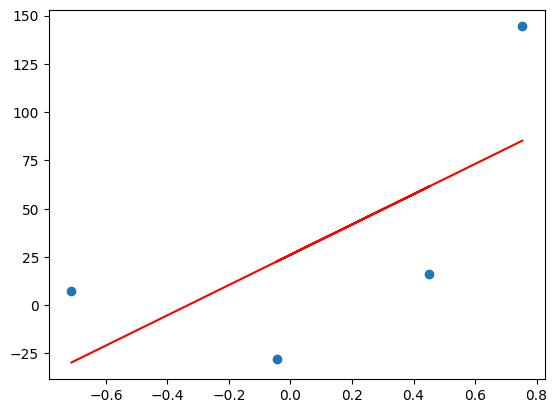

In [8]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [9]:
# lets apply Grsdient descent assuming slope is constant m=78.35
# and lets assume the starting value for intercept b=0
y_pred=((78.35*X)+0).reshape(4)

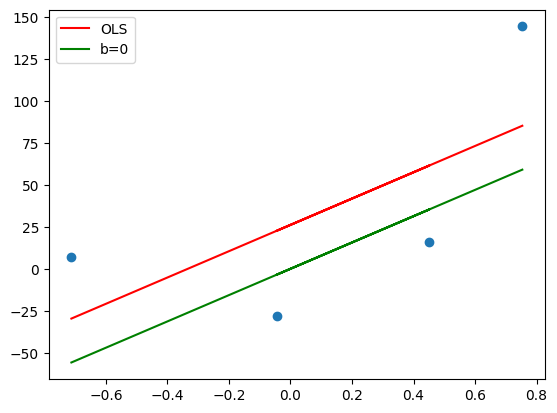

In [10]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='green',label='b=0')
plt.legend()
plt.show()

In [11]:
m=78.35
b=0
loss_slope=-2 * np.sum(y-m*X.ravel()-b)
loss_slope

-209.27763408209216

In [12]:
# lets take learning rate=0.1
lr=0.1

step_size=loss_slope*lr
step_size

-20.927763408209216

In [13]:
# calculating the new intercept
b=b-step_size
b

20.927763408209216

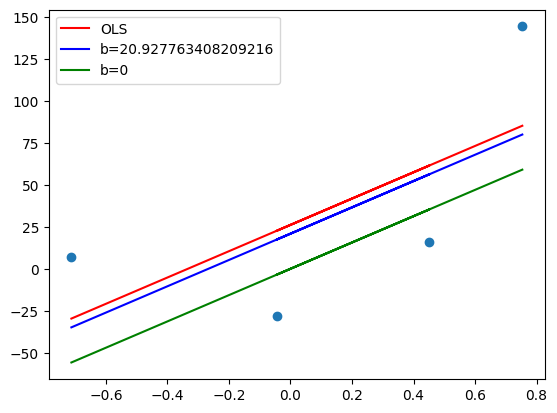

In [14]:
y_pred1=((78.35*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='blue',label='b={}'.format(b))
plt.plot(X,y_pred,color='green',label='b=0')
plt.legend()
plt.show()

In [15]:
# Iteration 2
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

-41.85552681641843

In [16]:
step_size=loss_slope*lr
step_size

-4.185552681641844

In [17]:
b=b-step_size
b

25.11331608985106

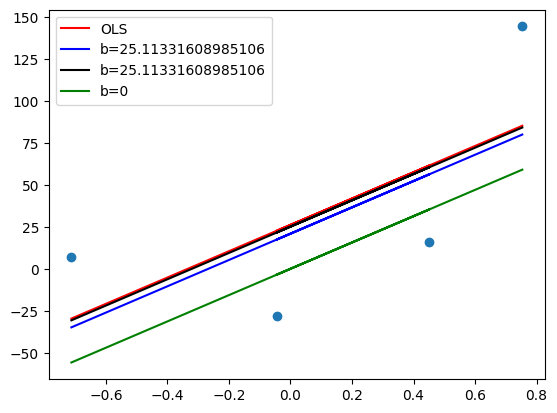

In [18]:
y_pred2=((78.35*X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='blue',label='b={}'.format(b))
plt.plot(X,y_pred2,color='black',label='b={}'.format(b))
plt.plot(X,y_pred,color='green',label='b=0')
plt.legend()
plt.show()

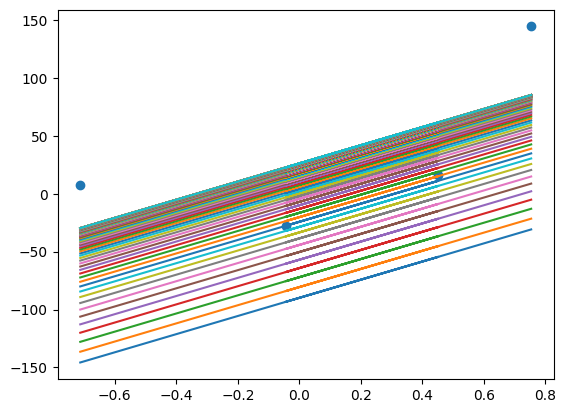

In [19]:
b=-100
m=78.35
lr=0.01
epochs=100
for i in range(epochs):
    loss_slope=-2*np.sum(y-m*X.ravel()-b)
    b=b-(lr*loss_slope)
    y_pred=m*X+b
    plt.plot(X,y_pred)
plt.scatter(X,y)    



# Gradient descent by  making class


In [137]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

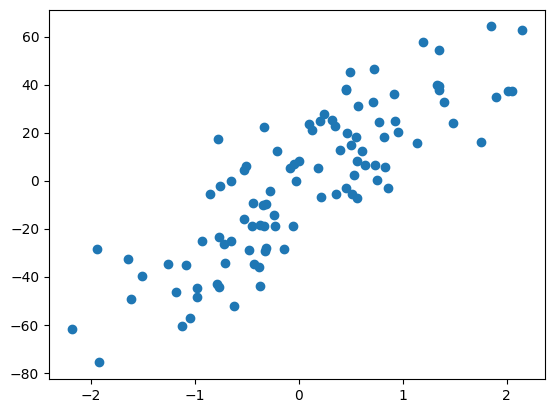

In [138]:
plt.scatter(X,y)

In [150]:
from sklearn.linear_model import LinearRegression


In [151]:
LR=LinearRegression()


In [152]:
LR.fit(X,y)
print(LR.coef_)
print(LR.intercept_)

[27.82809103]
-2.29474455867698


In [153]:
m=27.82

In [173]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=27.82
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,X,y):
        # calculating the b using GD
        for i in range(self.epochs):
            loss_slope=-2*np.sum(y-self.m*X.ravel()-self.b)
            self.b=self.b-(self.lr*loss_slope)
            print(loss_slope,self.b)
        print(self.b)    
            

In [174]:
gd=GDRegressor(0.001,100)

In [175]:
gd.fit(X,y)

-23541.145603484838 -96.45885439651516
-18832.916482787874 -77.62593791372728
-15066.333186230298 -62.55960472749699
-12053.06654898424 -50.50653817851275
-9642.45323918739 -40.86408493932536
-7713.962591349911 -33.15012234797545
-6171.170073079932 -26.978952274895516
-4936.936058463945 -22.04201621643157
-3949.548846771155 -18.092467369660415
-3159.6390774169245 -14.93282829224349
-2527.711261933539 -12.405117030309952
-2022.1690095468316 -10.38294802076312
-1617.735207637465 -8.765212813125654
-1294.1881661099717 -7.471024647015682
-1035.3505328879774 -6.435674114127704
-828.2804263103819 -5.607393687817322
-662.6243410483055 -4.944769346769017
-530.0994728386446 -4.4146698739303725
-424.07957827091553 -3.990590295659457
-339.2636626167326 -3.6513266330427245
-271.410930093386 -3.3799157029493383
-217.1287440747089 -3.1627869588746296
-173.70299525976702 -2.9890839636148625
-138.9623962078137 -2.850121567407049
-111.16991696625101 -2.738951650440798
-88.93593357300058 -2.650015716867

In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.6375011587464419

# Gradient descent from scratch

In [197]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
    def fit(self,X,y):
        # calculating the b using GD
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y- self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y- self.m*X.ravel()-self.b)*X.ravel())
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
         return self.m*X +self.b

In [198]:
gd=GDRegressor(0.001,100)

In [199]:
gd.fit(X,y)


27.828091872608653 -2.2947448944994893


In [200]:
gd.predict(X)

array([[-22.11921769],
       [-14.45967436],
       [-14.92180785],
       [ 24.22071289],
       [  4.32438488],
       [ 21.67112435],
       [ -9.06605019],
       [  2.851948  ],
       [-22.35879005],
       [-14.25796038],
       [ 53.78500537],
       [  8.75972323],
       [  3.48793408],
       [ -8.76271341],
       [-23.68416824],
       [ 10.31579463],
       [ 15.5120051 ],
       [  7.71035286],
       [-47.24011768],
       [ 46.38331635],
       [-24.25080397],
       [-16.54175657],
       [-28.12854285],
       [ 57.54630988],
       [ -8.06489135],
       [-47.90758693],
       [-11.71784478],
       [-11.25883162],
       [-15.69039288],
       [-16.85340673],
       [ 17.79616505],
       [ 19.01909815],
       [ 10.32476716],
       [-37.40283105],
       [-63.15798965],
       [-35.28268842],
       [  3.75651986],
       [ 34.72543668],
       [-32.54893408],
       [ 13.35192552],
       [-44.39433775],
       [ -2.36122692],
       [-10.03469777],
       [ 10